<a href="https://colab.research.google.com/github/Suryansh109/project_covid_v1/blob/master/DDos_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.1/spark-3.0.1-bin-hadoop3.2.tgz
!tar xf spark-3.0.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [8]:
import os

os.environ["JAVA_HOME"]="/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"]="/content/spark-3.0.1-bin-hadoop3.2"


In [9]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [13]:
!wget https://www.kaggle.com/devendra416/ddos-datasets


--2020-12-06 15:32:31--  https://www.kaggle.com/devendra416/ddos-datasets
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘ddos-datasets’

ddos-datasets           [  <=>               ]  42.39K   138KB/s    in 0.3s    

2020-12-06 15:32:33 (138 KB/s) - ‘ddos-datasets’ saved [43407]



In [28]:
from google.colab import files
!pip install -q kaggle

In [32]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [40]:
!kaggle datasets download -d devendra416/ddos-datasets

100% 2.67G/2.68G [02:10<00:00, 35.4MB/s]
100% 2.68G/2.68G [02:10<00:00, 22.1MB/s]


In [44]:
#!mkdir ddos_raw_data
!unzip ddos-datasets.zip -d ddos_raw_data




Archive:  ddos-datasets.zip
  inflating: ddos_raw_data/ddos_balanced/final_dataset.csv  
  inflating: ddos_raw_data/ddos_imbalanced/unbalaced_20_80_dataset.csv  


In [51]:
!ls -ltr  777 ddos_raw_data/*/*

ls: cannot access '777': No such file or directory
-rwxrwxrwx 1 root root 6794744782 Oct 22  2019 ddos_raw_data/ddos_balanced/final_dataset.csv
-rwxrwxrwx 1 root root 4121715182 Oct 22  2019 ddos_raw_data/ddos_imbalanced/unbalaced_20_80_dataset.csv


In [56]:
balanced_data=spark.read.option("header",True).format("csv").load("ddos_raw_data/ddos_balanced/final_dataset.csv")

In [59]:
from pyspark.sql import functions

In [69]:
balanced_data.count()

12794627

In [74]:
#checking dufferent attacks 
attack_group=balanced_data.groupBy("label").count()

In [85]:
attack_group.cache()

DataFrame[label: string, count: bigint]

In [87]:
import pandas as pd

In [89]:
attack_group_pd=attack_group.toPandas()

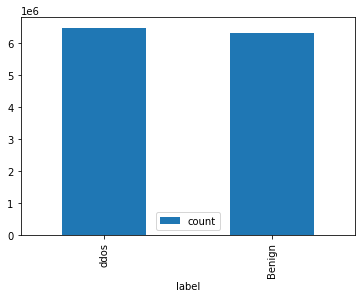

In [95]:

import matplotlib.pyplot as plt
attack_group_pd.plot(kind='bar',x='label',y='count')
plt.show()

In [96]:
attack_group_pd

,label,count
0,ddos,6472647
1,Benign,6321980
